In [185]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [186]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [187]:
from keras.layers import Flatten,Dense
from keras.models import Sequential

In [188]:
datasetss=tf.keras.datasets.fashion_mnist

In [189]:
(X_Train_Full,Y_Train_Full),(X_Test,Y_Test)=datasetss.load_data()

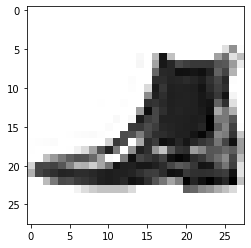

In [190]:
plt.imshow(X_Train[5],cmap="binary")

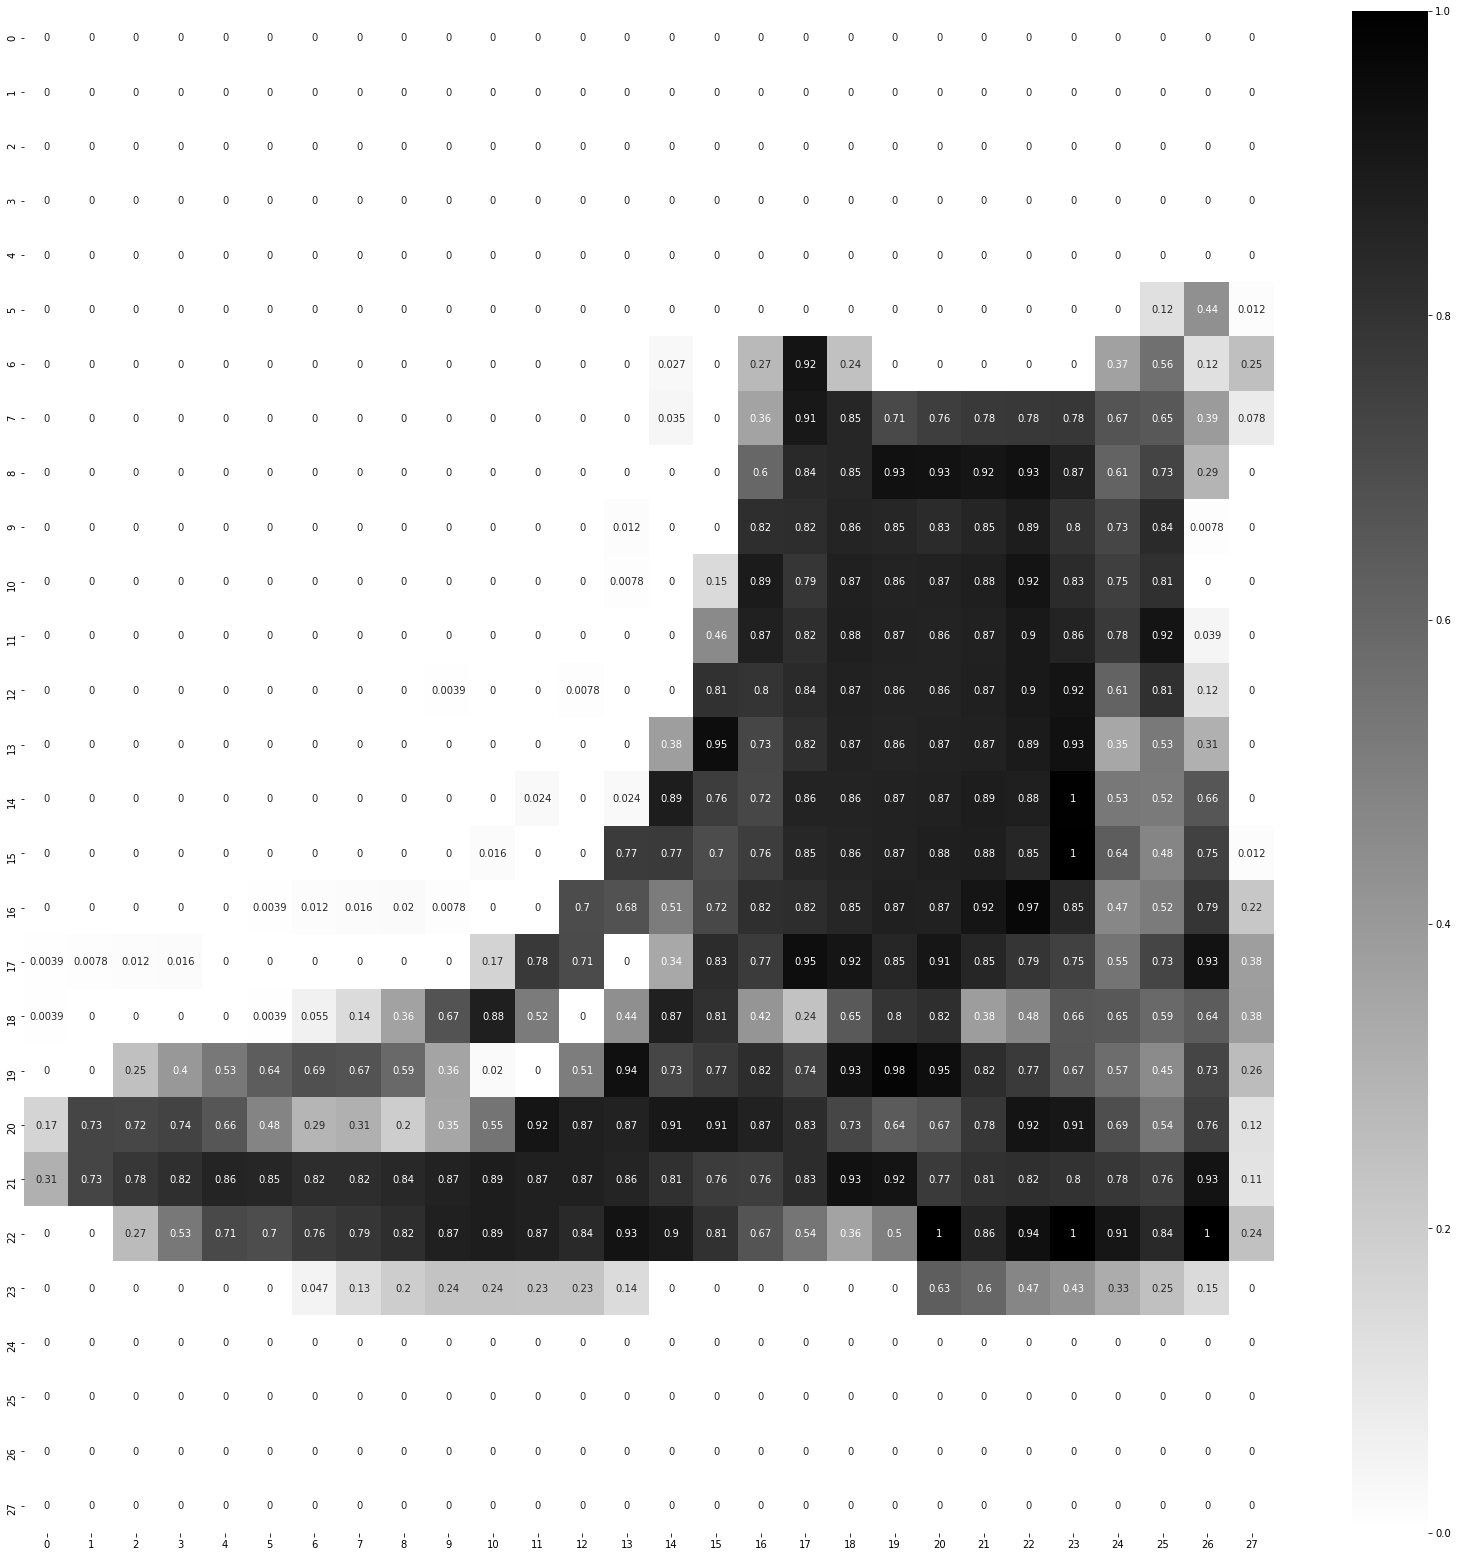

In [191]:
plt.figure(figsize=(28,28))
sns.heatmap(X_Train[5], annot=True,cmap="binary")

In [192]:
print("The x_test shape is",X_Test.shape)
print("The Y test shape is",Y_Test.shape)


The x_test shape is (10000, 28, 28)
The Y test shape is (10000,)


In [193]:
X_Train_Full.shape

(60000, 28, 28)

In [194]:
Y_Train_Full.shape

(60000,)

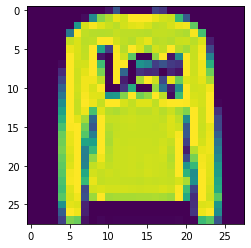

In [195]:
plt.imshow(X_Test[1])

In [196]:
print(Y_Test[1])

2


Text(0.5, 1.0, '9')

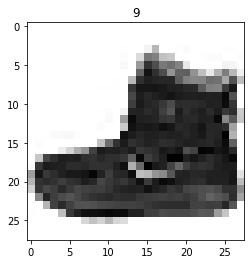

In [197]:
plt.imshow(X_Train_Full[0],cmap='binary')
plt.title(Y_Train_Full[0])

Text(0.5, 1.0, '8')

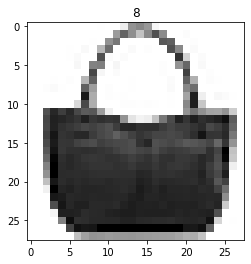

In [198]:
plt.imshow(X_Train_Full[100],cmap='binary')
plt.title(Y_Train_Full[100])

In [199]:
X_Valid,X_Train=X_Train_Full[0:5000]/255.,X_Train_Full[5000:]/255.
Y_Valid,Y_Train=Y_Train_Full[0:5000],Y_Train_Full[5000:]

Text(0.5, 1.0, '4')

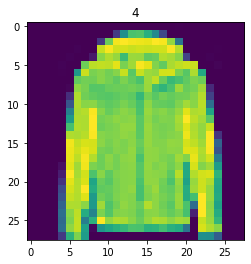

In [200]:
plt.imshow(X_Train[0])
plt.title(Y_Train[0])

In [201]:
print(Y_Train[0])

4


In [202]:
X_Test=X_Test/255.

In [203]:
print("X valid shape",X_Valid.shape)
print("X train shape",X_Train.shape)
print("Y_Valid shape",Y_Valid.shape)
print("Y Train shape",Y_Train.shape)

X valid shape (5000, 28, 28)
X train shape (55000, 28, 28)
Y_Valid shape (5000,)
Y Train shape (55000,)


In [204]:
num1=[]
num1=Y_Test

In [228]:
print(np.unique(num1))

[0 1 2 3 4 5 6 7 8 9]


In [238]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape = [28,28] ),
          tf.keras.layers.Dense(400, activation="relu"),
          tf.keras.layers.Dense(200, activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax")
]

In [239]:
model = tf.keras.models.Sequential(LAYERS)

In [240]:

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [241]:
model.fit(X_Train, Y_Train, epochs=10,validation_data=Valid_data, batch_size=32 )

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4799 - accuracy: 0.8277 - val_loss: 8.7789 - val_accuracy: 0.0706
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3589 - accuracy: 0.8680 - val_loss: 11.7173 - val_accuracy: 0.0726
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3252 - accuracy: 0.8797 - val_loss: 11.3395 - val_accuracy: 0.0732
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.8878 - val_loss: 12.3400 - val_accuracy: 0.0852
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8951 - val_loss: 12.0608 - val_accuracy: 0.0826
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9002 - val_loss: 13.8613 - val_accuracy: 0.0740
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2506 - accuracy: 0.9054 - val_loss: 13.6164 - val_acc

In [242]:
model.evaluate(X_Test, Y_Test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3775 - accuracy: 0.8806


[0.37752285599708557, 0.8805999755859375]

In [244]:
X_New = X_Test[:10]
Y_New = Y_Test[:10]
actual=Y_Test[:10]

In [245]:
y_prob = model.predict(X_New)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.066, 0.   ,
        0.934],
       [0.   , 0.   , 0.984, 0.   , 0.015, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.202, 0.   , 0.01 , 0.   , 0.001, 0.   , 0.786, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ]], dtype=float32)

In [246]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

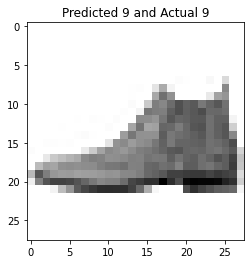

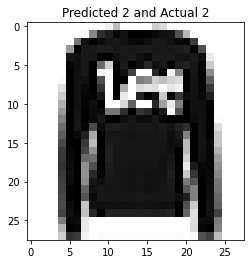

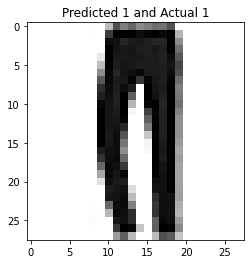

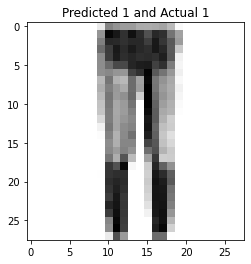

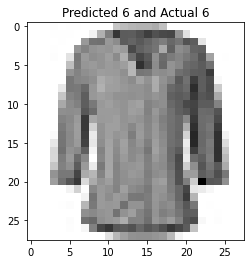

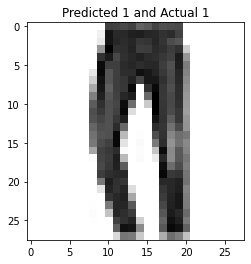

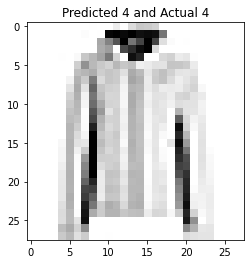

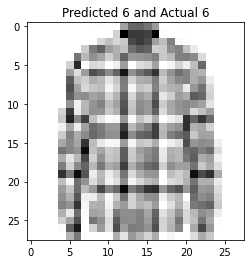

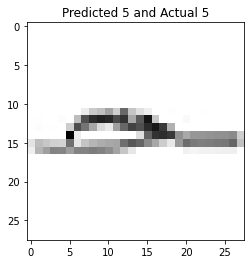

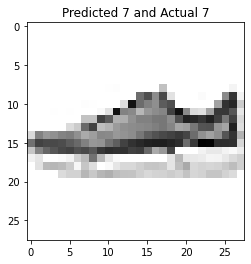

In [248]:
for data, pred, actual_data in zip(X_New, y_pred, actual):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")    
    plt.show() 
